In [76]:
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from netCDF4 import Dataset 
import shapefile as shp  # Requires the pyshp package
from plot_map import plot_single_map
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import sem

In [121]:
#loading in data to correct dataframe
regions = ['california','basin','mountains','southwest','northwest']#,'','','','',]
yearList = ['2016','2017','2018']
subject = "1_GW_Wind_results"
masterDict = dict()
locationData = np.ones((3,342))
boxplotIndexFixData = dict()
seabornBoxplotData = pd.DataFrame(columns=['california','basin','mountains','southwest','northwest','year'])
mainYearsArray = (np.ones(342) * 2016.0)
mainYearsArray = np.append(mainYearsArray,(np.ones(342) * 2017.0))
mainYearsArray = np.append(mainYearsArray,(np.ones(342) * 2018.0))
seabornBoxplotData['year'] = seabornBoxplotData['year'].append(pd.Series(mainYearsArray))
seabornBoxplotData = seabornBoxplotData.replace(np.nan, 0)
uniqueLats = []
uniqueLons = []
#figure size for graphs
figureSize = [7.5,5]
#loading in by region and year, stores in location by year
for regionIndex, region in enumerate(regions):
    masterDict[region] = np.ones((3,342))
    boxplotIndexFixData[region] =  np.ones((4,342))
    boxplotIndexFixData[region][0] = np.nan
    yearArray = []
    for index,year in enumerate(yearList):
        filepath = "%s/%s/%s.csv" % (region,year,subject)
        data = pd.read_csv(filepath)
        data = data.sort_values(by=['latitude', 'longitude'])
        masterDict[region][index] = data["ELCC"]
        boxplotIndexFixData[region][index+1] = data["ELCC"]
        if index == 0:
            yearArray = data["ELCC"]
            if regionIndex == 0:
                uniqueLats = data['latitude']
                uniqueLons = data['longitude']
        else:
            yearArray = yearArray.append(data["ELCC"])
    seabornBoxplotData[region] = pd.Series(np.array(yearArray))

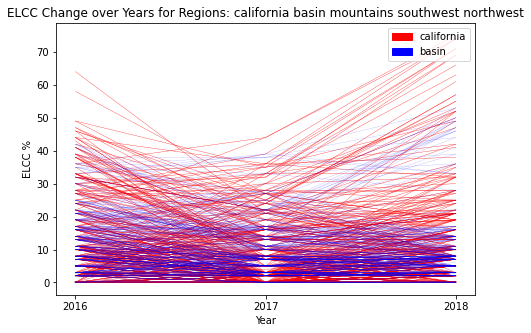

In [7]:
#basic line plot, not the very best representation for only three years, can tinker with the lineweights to change contrasts
colors = ['red','blue']
lineWeights = [.3,.1]
handleList = []
plt.figure(figsize=(figureSize[0],figureSize[1]))
for lineColor,region,lineWeight in zip(colors,regions,lineWeights):
    plt.plot(masterDict[region], color=lineColor,linewidth=lineWeight)
    handle = mpatches.Patch(color=lineColor, label=region)
    handleList.append(handle)
    
#formating
plt.xlabel('Year')
plt.ylabel('ELCC %')
plt.title('ELCC Change over Years for Regions: ' + ' '.join(regions))
plt.legend(handles=handleList,loc="upper right")
plt.xticks(np.arange(3), ('2016', '2017', '2018'))
plt.show()

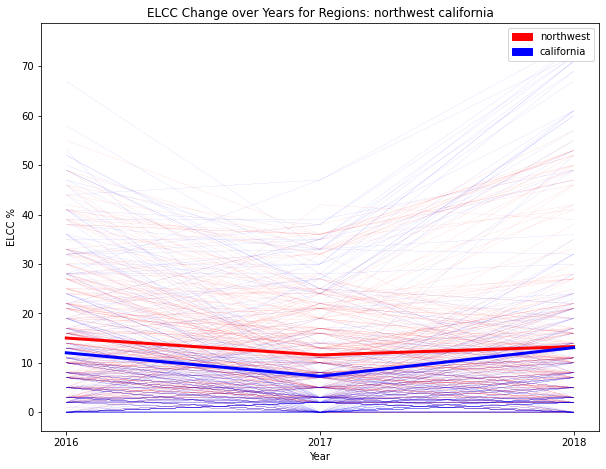

In [4]:
##Plot for mean changes of lines overlaid onto prior image but faded more

colors = ['red','blue']
lineWeights = [.05,.05]
plt.figure(figsize=(figureSize[0],figureSize[1]))
for lineColor,region,lineWeight in zip(colors,regions,lineWeights):
    plt.plot(masterDict[region], color=lineColor,linewidth=lineWeight)


#looking at mean values of each and plotting over, new loop due to lineWeight difference
for lineColor,region in zip(colors,regions):
    plt.plot(masterDict[region].mean(axis=1), color=lineColor,linewidth=3)

plt.xlabel('Year')
plt.ylabel('ELCC %')
plt.title('ELCC Change over Years for Regions: ' + ' '.join(regions))
#plt.legend(loc="upper right")
plt.xticks(np.arange(3), ('2016', '2017', '2018'))
plt.legend(handles=handleList,loc="upper right")

plt.show()

In [62]:
#mix of boxplot and line plots over each other first is with multi coloured lines next is with one color
#boxplot with each respective year and associated means, can't see specific variations by location however
# I personally like this one better then the one with all colors because youre able to track the changes over years for a specific cord
# Creating axes instance
lineWeight = .2
color = 'blue'
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at zero)
    
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(3,2,index+1)
    plt.boxplot(boxplotData,labels = yearList) 
    plt.plot(boxplotIndexFixData[region],linewidth=lineWeight)
    plt.title("ELCC change over years for %s" %(region))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

california
basin
mountains
southwest
northwest


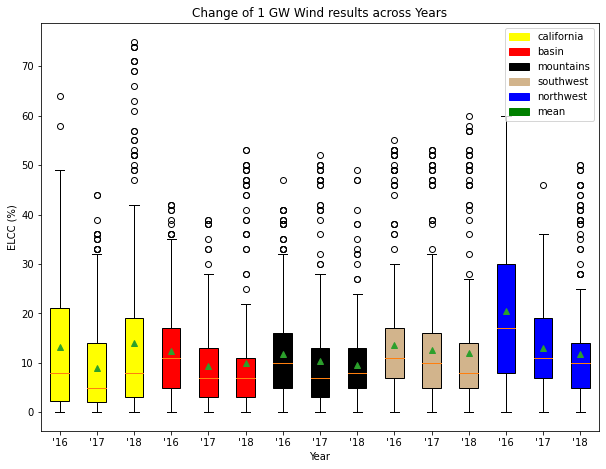

In [9]:
#boxplot with each respective year and associated means, can't see specific variations by location however
# Creating axes instance
#%matplotlib widget
yearList = ['2016','2017','2018']
labelList = (np.ones(len(regions)*3) * 2).tolist()
figureSize = [10,7.5]
plt.figure(figsize=(figureSize[0],figureSize[1]))
for index,region in enumerate(regions):
    print(region)
    if (index):
        labelList[index*3] = (" '16 ")#%s " %(region))
        labelList[index*3 +1] = (" '17 ")#%s " %(region))
        labelList[index*3+2] = (" '18 ")#%s " %(region))
        addList =  np.array([masterDict[region][0],masterDict[region][1],masterDict[region][2]])
        boxplotData = np.concatenate((boxplotData, addList), axis=0)
    else:
        #inital list creation
        labelList[index*3] = (" '16 ")#%s " %(region))
        labelList[index*3 +1] = (" '17 ")#%s " %(region))
        labelList[index*3+2] = (" '18 ")#%s " %(region))
        boxplotData = np.array([masterDict[region][0],masterDict[region][1],masterDict[region][2]])
    # Creating plot 
box = plt.boxplot(boxplotData.T,labels = labelList,showmeans = True,patch_artist= True)
plt.title("Change of %s across Years" % (subject.replace("_", " ")))
plt.xlabel("Year")
plt.ylabel("ELCC (%)")
colors = ['yellow', 'red', 'black', 'tan','blue']
colorIndex = -1
#filling in colors
handleList = []
for boxIndex, patch in enumerate(box['boxes']):
    if not (boxIndex  % 3):
        colorIndex += 1
        handle = mpatches.Patch(color=colors[colorIndex], label=regions[colorIndex])
        handleList.append(handle)
    patch.set_facecolor(colors[colorIndex])
meanLineHandle = mpatches.Patch(color='green', label="mean")
handleList.append(meanLineHandle)

plt.legend(handles=handleList,loc="upper right")#,fontsize ='small')
#plt.legend([box["boxes"][0:2:len(box["boxes"])]], regions, loc='upper right')

In [131]:
rastData =  Dataset("offshore_bounds/offshoreBoundaries.nc")
tester = masterDict
#setting up values for raster data
latsRast =  np.array(rastData["lat"][:])
lonsRast =  np.array(rastData["lon"][:])
regionOfInterest = np.array(rastData["Band1"][:][:])
for lat in np.unique(uniqueLats):
    closestLatIndex = np.where( np.abs(latsRast-lat) == np.abs(latsRast-lat).min())[0][0]
    for lon in np.unique(uniqueLons):
        closestLonIndex = np.where( np.abs(lonsRast-lon) == np.abs(lonsRast-lon).min())[0][0]

        #if data is offshore get rid of it (set to nan)
        if (regionOfInterest[closestLatIndex][closestLonIndex] == 1):
            latIndex = np.where(uniqueLats == lat)[0][0]
            lonIndex = np.where(uniqueLons == lon)[0][0]
            if(latIndex == lonIndex):
                for region in regions:
                    for yearIndex in range(0,3):
                        tester[region][yearIndex][latIndex] = np.nan
        
        
print(tester)        
'''  
yearList = ['2016','2017','2018']
labelList = (np.ones(len(regions)*3) * 2).tolist()
figureSize = [10,7.5]
plt.figure(figsize=(figureSize[0],figureSize[1]))
for index,region in enumerate(regions):
    print(region)
    if (index):
        labelList[index*3] = (" '16 ")#%s " %(region))
        labelList[index*3 +1] = (" '17 ")#%s " %(region))
        labelList[index*3+2] = (" '18 ")#%s " %(region))
        addList =  np.array([tester[region][0],tester[region][1],tester[region][2]])
        boxplotData = np.concatenate((boxplotData, addList), axis=0)
    else:
        #inital list creation
        labelList[index*3] = (" '16 ")#%s " %(region))
        labelList[index*3 +1] = (" '17 ")#%s " %(region))
        labelList[index*3+2] = (" '18 ")#%s " %(region))
        boxplotData = np.array([tester[region][0],tester[region][1],tester[region][2]])
    # Creating plot 
box = plt.boxplot(boxplotData.T,labels = labelList,showmeans = True,patch_artist= True)
plt.title("Change of %s across Years" % (subject.replace("_", " ")))
plt.xlabel("Year")
plt.ylabel("ELCC (%)")
colors = ['yellow', 'red', 'black', 'tan','blue']
colorIndex = -1
#filling in colors
handleList = []
for boxIndex, patch in enumerate(box['boxes']):
    if not (boxIndex  % 3):
        colorIndex += 1
        handle = mpatches.Patch(color=colors[colorIndex], label=regions[colorIndex])
        handleList.append(handle)
    patch.set_facecolor(colors[colorIndex])
meanLineHandle = mpatches.Patch(color='green', label="mean")
handleList.append(meanLineHandle)

plt.legend(handles=handleList,loc="upper right")#,fontsize ='small')
'''

{'california': array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, 33., 35., ..., 24., 33., 36.],
       [nan, 66., 71., ..., 25., 33., 38.]]), 'basin': array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, 22., 35., ..., 22., 21., 17.],
       [nan, 39., 39., ..., 14., 13., 13.]]), 'mountains': array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, 42., 42., ..., 17., 16., 13.],
       [nan, 14., 14., ..., 19., 16., 14.]]), 'southwest': array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, 46., 46., ..., 22., 22., 21.],
       [nan, 49., 53., ..., 17., 21., 22.]]), 'northwest': array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, 30., 32., ..., 22., 21., 17.],
       [nan, 39., 46., ..., 11., 13., 13.]])}


'  \nyearList = [\'2016\',\'2017\',\'2018\']\nlabelList = (np.ones(len(regions)*3) * 2).tolist()\nfigureSize = [10,7.5]\nplt.figure(figsize=(figureSize[0],figureSize[1]))\nfor index,region in enumerate(regions):\n    print(region)\n    if (index):\n        labelList[index*3] = (" \'16 ")#%s " %(region))\n        labelList[index*3 +1] = (" \'17 ")#%s " %(region))\n        labelList[index*3+2] = (" \'18 ")#%s " %(region))\n        addList =  np.array([tester[region][0],tester[region][1],tester[region][2]])\n        boxplotData = np.concatenate((boxplotData, addList), axis=0)\n    else:\n        #inital list creation\n        labelList[index*3] = (" \'16 ")#%s " %(region))\n        labelList[index*3 +1] = (" \'17 ")#%s " %(region))\n        labelList[index*3+2] = (" \'18 ")#%s " %(region))\n        boxplotData = np.array([tester[region][0],tester[region][1],tester[region][2]])\n    # Creating plot \nbox = plt.boxplot(boxplotData.T,labels = labelList,showmeans = True,patch_artist= True)\np

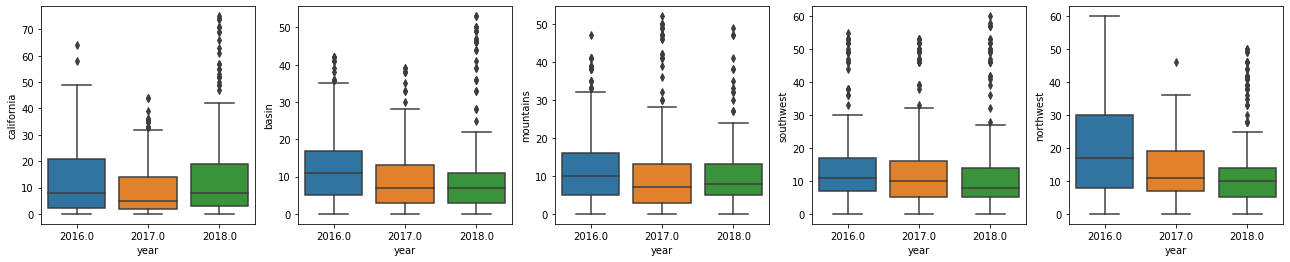

In [120]:
#seaborn boxplot attempt did not turn out well boys
fig, ax = plt.subplots(1,5, sharey=True)
for regionIndex,region in enumerate(regions):
    plt.subplot(1,5,regionIndex+1)
    sns.boxplot('year',region, data = seabornBoxplotData)
#ax = sns.swarmplot(seabornBoxplotData['year'],seabornBoxplotData['california'], color=".25")
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplots_adjust(right=3, top=None, wspace=None)

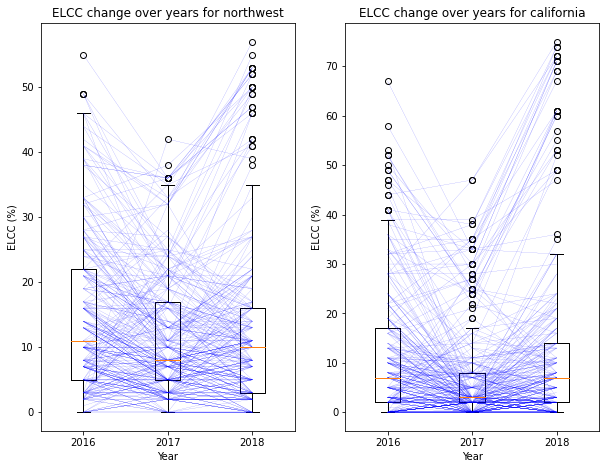

In [7]:
#mix of boxplot and line plots with set color such as blue
# Creating axes instance
lineWeight = .1
color = 'blue'
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.boxplot(boxplotData,labels = yearList)
    plt.title("ELCC change over years for %s" %(region))
    plt.plot(boxplotIndexFixData[region],linewidth=lineWeight,color=color)
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")

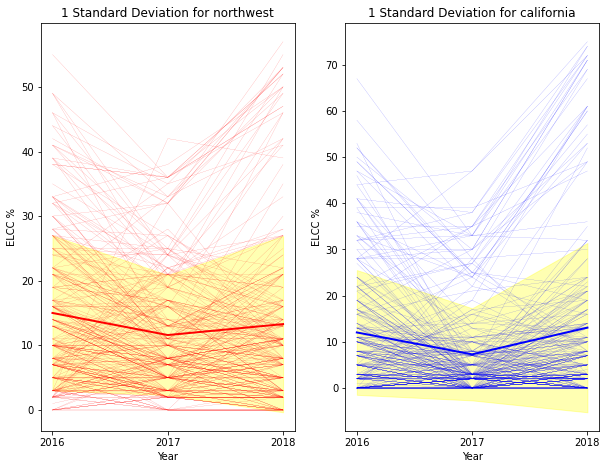

In [8]:
#plot with faded errors of 1 standard deviation in data (would need to fix the bottem portions 
#so they stop at zero if we wanted to go with this option)

plt.figure(figsize=(figureSize[0],figureSize[1]))

lineWeights = [.1,.1]
for index,lineColor,region,lineWeight in zip(enumerate(colors),colors,regions,lineWeights):
    plt.subplot(1,2,index[0]+1)
    plt.plot(masterDict[region], color=lineColor,linewidth=lineWeight)
    mean = masterDict[region].mean(axis=1)
    std = np.std(masterDict[region], axis = 1)
    plt.plot(mean, color=lineColor, lw=2) 
    plt.fill_between([0,1,2],mean - std, mean + std, color='yellow',alpha=.3)  


    # Plot settings
    plt.xlabel('Year')
    plt.ylabel('ELCC %')
    plt.title('1 Standard Deviation for ' + region)
    plt.xticks(np.arange(3), ('2016', '2017', '2018'))
plt.show()

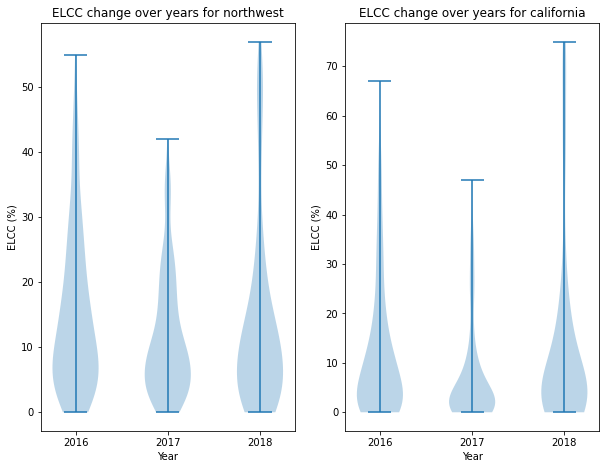

In [9]:
#violin plots by themselves!
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.violinplot(boxplotData)
    plt.title("ELCC change over years for %s" %(region))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")
    plt.xticks(np.arange(1,4), ('2016', '2017', '2018'))


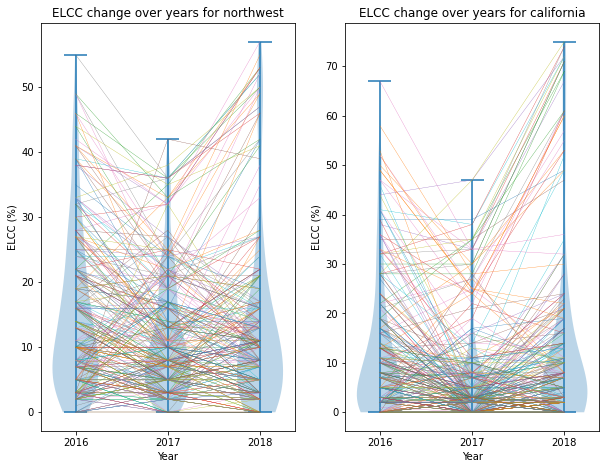

In [10]:
#violin plots overlaid with unique colors!
lineWeight = .3
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.violinplot(boxplotData)
    plt.title("ELCC change over years for %s" %(region))
    plt.plot(boxplotIndexFixData[region],linewidth=lineWeight)
    plt.xticks(np.arange(1,4), ('2016', '2017', '2018'))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")

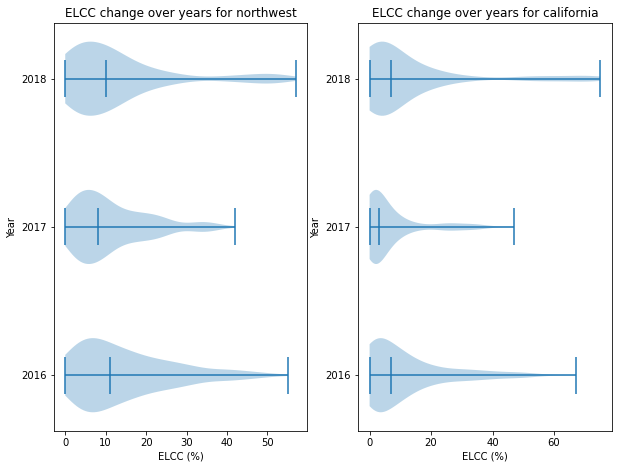

In [11]:
#violin plots flipped (not sure how to plot the data on this flipped version, but can do if we want to pursue this option)
#lines displayed are the medians too
lineWeight = .3
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.violinplot(boxplotData,vert = False,showmedians = True)
    plt.title("ELCC change over years for %s" %(region))
    plt.yticks(np.arange(1,4), ('2016', '2017', '2018'))
    plt.ylabel("Year")
    plt.xlabel("ELCC (%)")

In [20]:
#3d plot for ELCC values my guess for why we have bunches like that so high up is due to Offshore wind
#some weird stuff starts to happen when we swicth to solar though...

%matplotlib widget
fig = plt.figure(figsize=(figureSize[0],figureSize[1]))
ax = fig.add_subplot(111, projection='3d')
test = masterDict[region][0:2]
ax.scatter(masterDict[region][0],masterDict[region][1],masterDict[region][2])
ax.set_xlabel('ELLC % (from 2016)')
ax.set_ylabel('ELLC % (from 2017)')
ax.set_zlabel('ELLC % (from 2018)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
#plot for calculating IAV for ELCC results

for region in regions:
    for yearIndex in [0,1,2]:
        meanValues16 = np.mean(masterDict[region][yearIndex],axis=1)
        standardDev16 = np.std(masterDict[region][yearIndex],axis=1)
    print(meanValues16)
    iavValues = meanValues/standardDev
    #print(iavValues.shape)
    #plt.plot(iavValues)
    #plt.show()

IndexError: tuple index out of range